# Data predictive analytics

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path='/content/Algeria2024.csv'
df=pd.read_csv(path)
df.head(5)

,Year,Electric power consumption (kWh per capita)
0,1971,133
1,1972,142
2,1973,158
3,1974,170
4,1975,195


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Year                                         49 non-null     int64
 1   Electric power consumption (kWh per capita)  49 non-null     int64
dtypes: int64(2)
memory usage: 912.0 bytes


In [7]:
df.head()

,Year,Electric power consumption (kWh per capita)
0,1971,133
1,1972,142
2,1973,158
3,1974,170
4,1975,195


In [8]:
df.columns

Index(['Year', 'Electric power consumption (kWh per capita)'], dtype='object')

In [9]:
df.dtypes

,0
Year,int64
Electric power consumption (kWh per capita),int64


# Time series models

## ARIMA

In [10]:
# Check the data type  index
print(df.index.dtype)

# If it's not a string type, convert it
if df.index.dtype != 'object':
    df.index = df.index.astype(str)

# Now proceed with the cleanup and conversion
df.index = df.index.str.strip()
df.index = pd.to_datetime(df.index, format="%Y", errors='coerce')
df.index = df.index + pd.offsets.YearEnd(0)
df.rename(columns={"Electric power consumption (kWh per capita)":" power consumption"},inplace=True)

int64


In [11]:
df.head()

,Year,power consumption
NaT,1971,133
NaT,1972,142
NaT,1973,158
NaT,1974,170
NaT,1975,195


In [12]:
df.dtypes

,0
Year,int64
power consumption,int64


In [13]:
# If 'Year' is a column, first reset the index if it's already set
df.reset_index(inplace=True, drop=True)

# Set the 'Year' column as the index
df.set_index('Year', inplace=True)

# Convert the index to datetime format
df.index = pd.to_datetime(df.index, format="%Y", errors='coerce')


In [14]:
print(df.head())
print(df.index.dtype)


             power consumption
Year                          
1971-01-01                 133
1972-01-01                 142
1973-01-01                 158
1974-01-01                 170
1975-01-01                 195
datetime64[ns]


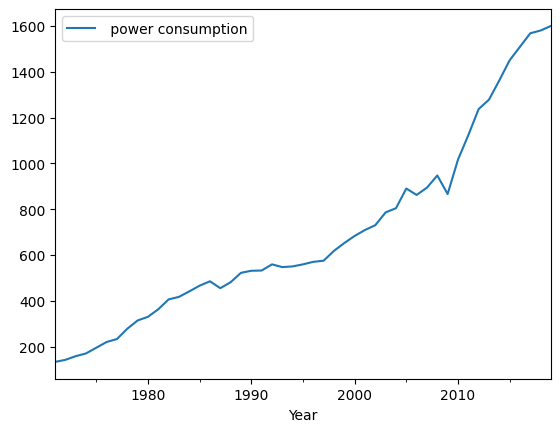

In [17]:
df.plot()
plt.show()


check stat

In [19]:
df.columns

Index([' power consumption'], dtype='object')

In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[' power consumption'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 2.339409995706415
p-value: 0.99897888008278


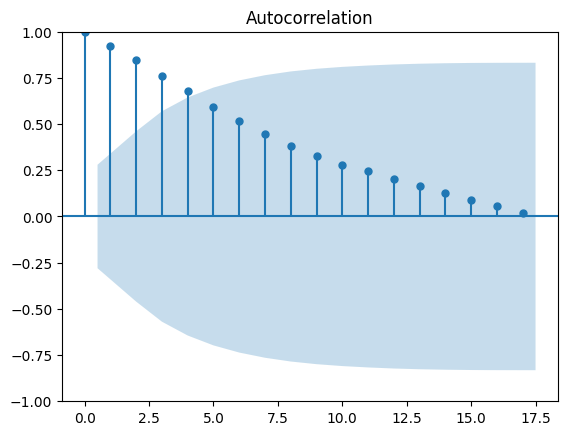

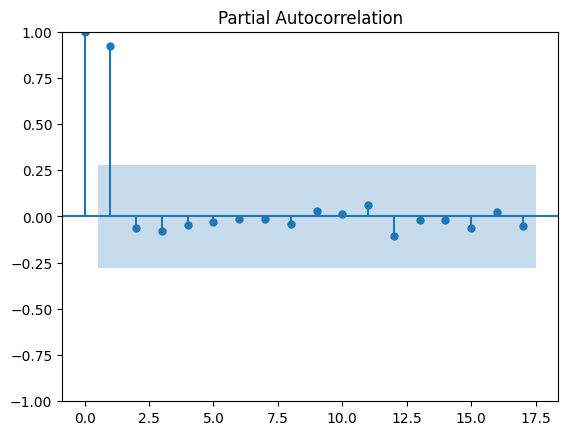

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df[' power consumption'])
plot_pacf(df[' power consumption'])
plt.show()


In [25]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df[' power consumption'], order=(1, 0, 1))

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:      power consumption   No. Observations:                   49
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -259.307
Date:                Tue, 20 Aug 2024   AIC                            526.613
Time:                        20:36:08   BIC                            534.181
Sample:                    01-01-1971   HQIC                           529.484
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        689.7781   2029.061      0.340      0.734   -3287.108    4666.665
ar.L1          0.9967      0.032     30.740      0.000       0.933       1.060
ma.L1          0.2807      0.132      2.131      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


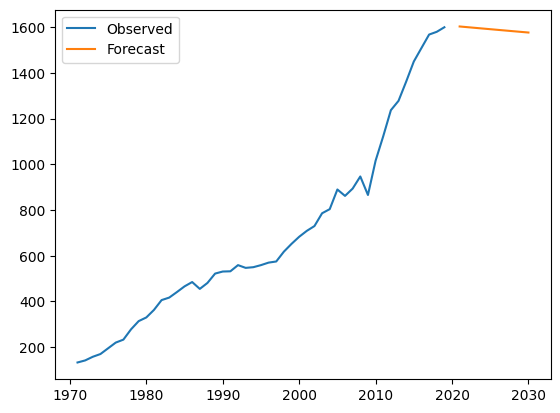

In [27]:
# Forecast for the next 10 years
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.plot(df.index, df[' power consumption'], label='Observed')
plt.plot(pd.date_range(df.index[-1], periods=11, freq='Y')[1:], forecast, label='Forecast')
plt.legend()
plt.show()


In [28]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.4 MB/s eta 0:00:00


In [29]:
import pmdarima as pm

# Assume 'power consumption' is your target variable
y = df[' power consumption']

# Auto fit the ARIMA model
model = pm.auto_arima(y,
                      seasonal=False,       # Assuming no seasonality
                      stepwise=True,        # Use stepwise search to reduce computation
                      suppress_warnings=True,
                      trace=True)           # Trace shows the progress

# Print the summary of the model
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=506.986, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=490.095, Time=0.19 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=504.987, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=485.364, Time=1.58 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=486.703, Time=0.37 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=483.373, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=488.096, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=484.719, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=482.154, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=480.375, Time=0.07 sec
 A

In [31]:
# Define the number of periods to forecast
forecast_years = 2030 - df.index[-1].year

# Forecast the values
forecast = model.predict(n_periods=forecast_years)

# Create a date range for the forecasted years (e.g., 2024-2030)
last_year = df.index[-1].year
future_years = [last_year + i for i in range(1, forecast_years + 1)]
future_dates = pd.to_datetime(future_years, format='%Y')

# Convert the forecast to a DataFrame
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])

# Print the specific forecasted values for 2024-2030
print(forecast_df.loc['2024':'2030'])


               Forecast
2024-01-01  1844.170686
2025-01-01  1893.004823
2026-01-01  1941.838961
2027-01-01  1990.673098
2028-01-01  2039.507235
2029-01-01  2088.341372
2030-01-01  2137.175509
